**Sales Analysis**
<br>
In this project, I try to explore sales dataset(of e-commerce company) which I downloaded from kaggle.
<br>
The dataset contains 10 .csv file for each month of 2019 year.
<br>
<br>
The columns in my dataframe are:
<br>
1.Order ID - Id given to the product for specific order
<br>
2.Product - Name of the product
<br>
3.Quantity Ordered - Quantity ordered by the users
<br>
4.Order Date - Date and time in which order is placed
<br>
5.Purchase Address - Address from which customer purchase product
<br>
<br>
Following are the things along with some visualization, I tried to find from this dataset:
<br>
**1.Finding best month of sales along with highest orders
<br>
2.Getting maximum sales month along with highest sales
<br>
3.Which city has the highest Sales
<br>
4.Calculating time to be displayed for advertisements to maximize likelihood of customer's buying product
<br>
5.Identifying products that are most often solds**

**Importing necessary Libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading single month sales
df = pd.read_csv('Sales_Data/Sales_August_2019.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11983 non-null  object
 1   Product           11983 non-null  object
 2   Quantity Ordered  11983 non-null  object
 3   Price Each        11983 non-null  object
 4   Order Date        11983 non-null  object
 5   Purchase Address  11983 non-null  object
dtypes: object(6)
memory usage: 563.1+ KB


In [5]:
#Listing all the files inside Sales Data directory
os.listdir('Sales_Data')

['.ipynb_checkpoints',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
#Merging all months data into one dataframe
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
    

In [7]:
df = pd.read_csv('all_data.csv')
    

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
#showing general information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
#checking for null values in our dataframe
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [11]:
#dropping nan data from our dataframe
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [15]:
#creating Month column from Order Date using lamda function
df['Month'] = df['Order Date'].apply(lambda x : x[0:2])

In [16]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


**1. Finding best month of sales along with number of orders**

In [17]:
#counting no of orders according to month
df['Month'].value_counts()

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Or      355
Name: Month, dtype: int64

In [18]:
df[df['Month'] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [19]:
#Or is noisy data so removing it from our month column
df.drop(df.index[df['Month'] == 'Or'], inplace = True)

In [20]:
df['Month'].value_counts()
#December month has most placed orded with orders of 24984

12    24984
10    20282
04    18279
11    17573
05    16566
03    15153
07    14293
06    13554
02    11975
08    11961
09    11621
01     9709
Name: Month, dtype: int64

<AxesSubplot:>

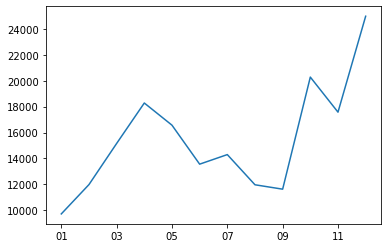

In [21]:
df['Month'].value_counts().sort_index().plot()

<AxesSubplot:>

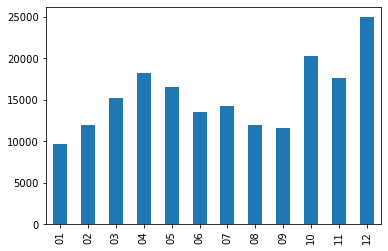

In [22]:
df['Month'].value_counts().sort_index().plot(kind='bar')

In [23]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Adding Sales column, which is the multiple of Quantity Ordered and Price Each

In [24]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float)
df['Price Each'] = df['Price Each'].astype(float)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


**2. Getting maximum sales month along with highest sales**

In [26]:
res = df.groupby('Month').sum()
res
#Maximum sales month is 12(December) and highest sale is 4.613443e+06
#Worst month for sales seems to be 1(January) in which sales were 1.822257e+06

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1.811768e+06,1.822257e+06
02,13449.0,2.188885e+06,2.202022e+06
03,17005.0,2.791208e+06,2.807100e+06
04,20558.0,3.367671e+06,3.390670e+06
05,18667.0,3.135125e+06,3.152607e+06
06,15253.0,2.562026e+06,2.577802e+06
07,16072.0,2.632540e+06,2.647776e+06
08,13448.0,2.230345e+06,2.244468e+06
09,13109.0,2.084992e+06,2.097560e+06


Text(0, 0.5, 'Sales')

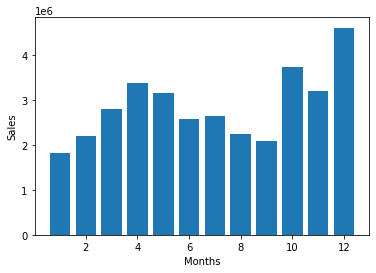

In [27]:
months = range(1,13)
plt.bar(months,res['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales')

In [28]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


**3. Which city has the highest Sales**

In [29]:
#creating get_city and get_state function to get city and state name from Purchase Address column
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address[-8:-6]

In [30]:
df['City'] = df['Purchase Address'].apply(lambda x : f"{get_city(x)}({get_state(x)})")


In [31]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [32]:
res = df.groupby('City').sum()
res
#San Franciso CA has highest number of sales with sales 8.262204e+06

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta(GA),16602.0,2.779908e+06,2.795499e+06
Austin(TX),11153.0,1.809874e+06,1.819582e+06
Boston(MA),22528.0,3.637410e+06,3.661642e+06
Dallas(TX),16730.0,2.752628e+06,2.767975e+06
Los Angeles(CA),33289.0,5.421435e+06,5.452571e+06
New York City(NY),27932.0,4.635371e+06,4.664317e+06
Portland(ME),2750.0,4.471893e+05,4.497583e+05
Portland(OR),11303.0,1.860558e+06,1.870732e+06
San Francisco(CA),50239.0,8.211462e+06,8.262204e+06


In [33]:
res.index

Index([' Atlanta(GA)', ' Austin(TX)', ' Boston(MA)', ' Dallas(TX)',
       ' Los Angeles(CA)', ' New York City(NY)', ' Portland(ME)',
       ' Portland(OR)', ' San Francisco(CA)', ' Seattle(WA)'],
      dtype='object', name='City')

Text(0, 0.5, 'Sales')

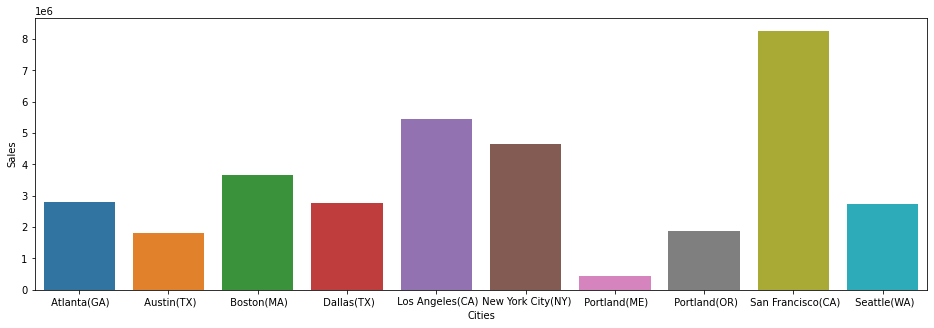

In [34]:
#plotting Cities with Sales
plt.figure(figsize=(16,5))
sns.barplot(x=res.index,y=res['Sales'])
plt.xlabel('Cities')
plt.ylabel('Sales')

In [35]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


**4. Calculating time to be displayed for advertisements to maximize likelihood of customer's buying product**

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [37]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA)


In [38]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27


In [40]:
res = df['Hour'].value_counts()

In [41]:
res
#at around 11am-12am and 7pm our ads be displayed for advertisements to maximize likelihood of customer's buying product

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Hour, dtype: int64

In [42]:
res = df.groupby('Hour').count()

In [43]:
res

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0, 0.5, 'No of orders(Sales)')

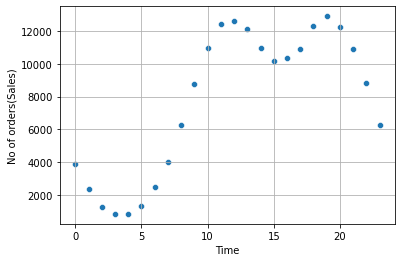

In [44]:
sns.scatterplot(x=range(0,24),y=res['Sales'])
plt.grid()
plt.xlabel('Time')
plt.ylabel('No of orders(Sales)')
#Plotting time with no. of orders

Text(0, 0.5, 'No of orders(Sales)')

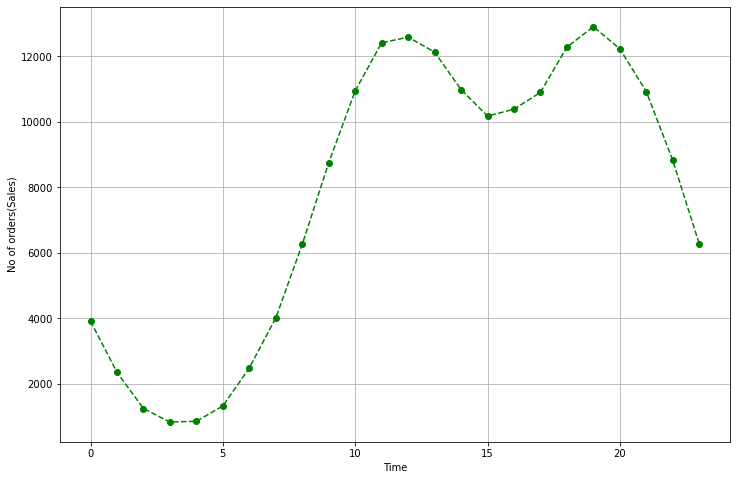

In [45]:
plt.figure(figsize=(12,8))
plt.plot(range(0,24),res['Sales'],'go--')
plt.grid()
plt.xlabel('Time')
plt.ylabel('No of orders(Sales)')

**5. Identifying products that are most often solds**

In [46]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston(MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles(CA),9,27


In [47]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

Text(0, 0.5, 'Orders')

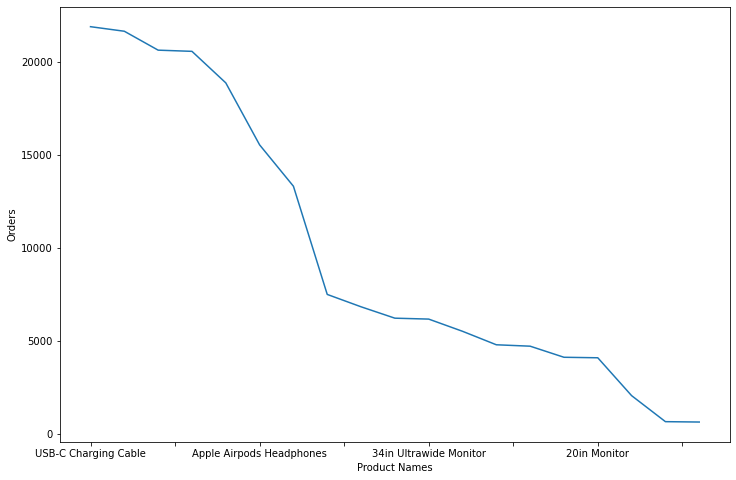

In [48]:
#USB-C charging cable is most ordered product 
plt.figure(figsize=(12,8))
df['Product'].value_councdts().plot()
plt.xlabel('Product Names')
plt.ylabel('Orders')

In conclusion,
<br>
the answer of above questions are;
<br>
1.Find best month of sales along with highest number orders?
<br>
**Ans. December month has most placed order with 24984 orders.**
<br>
2.Find maximum sales month along with highest sales?
<br>
**Ans. Maximum sales month is 12(December) and highest sale is 4.613443e+06. 
     Worst month for sales seems to be 1(January) in which sales were 1.822257e+06**
<br>
3.Which city has the highest Sales?
<br>
**Ans. San Franciso CA has highest number of sales with sales 8.262204e+06**
<br>
4.Calculate time to be displayed for advertisements to maximize likelihood of customer's buying product?
<br>
**Ans. At around 11am-12am and 7pm ads needs to be displayed for advertisements to maximize likelihood of customer's buying product**
<br>
5.Identify products that are most often solds?
<br>
**Ans. USB-C charging cable is most ordered product**